In [ ]:
# FAILED CREATING EXPRESSION TABLE
# this is the first trial using miner2. It did not work, as it was trying to read the folder as a file 

# import stuff
import miner2
import miner2.preprocess, miner2.coexpression, miner2.mechanistic_inference, miner2.miner, miner2.__init__
import os, sys, numpy, datetime
import matplotlib, matplotlib.pyplot

# variables
GDC_download_folder = '/Users/user/projects/melanoma/GDC_zipFiles'
results_dir = '/Users/user/projects/melanoma/GDC_Data/results'

#preprocess the data
expression_data, conversion_table = miner2.preprocess.main(GDC_download_folder)
    # does not access files in the foler

In [9]:
#CREATING EXPRESSION TABLE
#this is our second attempt using the old miner to preprocess the data, which effectively created an expression table

#importing various things
import miner2

# variables
GDC_download_folder = '/Users/user/projects/melanoma/GDC_zipFiles'
results_dir = '/Users/user/projects/melanoma/GDC_Data/results'


# preprocessing the data into a readable format
expressionDataRaw  = miner2.miner.readExpressionFromGZipFiles(GDC_download_folder)
expressionData = miner2.miner.transformFPKM(expressionDataRaw,fpkm_threshold=1,minFractionAboveThreshold=0.5,highlyExpressed=False)
#expressionData, conversionTable = miner2.miner.identifierConversion(expressionData)
    # error: IOError: [Errno 2] File ../data/identifier_mappings.txt does not exist: '../data/identifier_mappings.txt'
    # we do not need to use this because the genes are already mapped, and the correct values are assigned to the correct genes
expressionData = miner2.preprocess.zscore(expressionData)

completed z-transformation.


completed z-transformation.


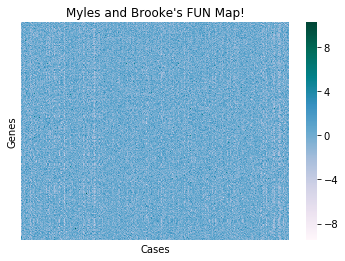

In [8]:
# HEAT MAP ON OUR OWN
# this is the code that we used to create the heat map using our own code

#importing various things
import miner2
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt

# variables
GDC_download_folder = '/Users/user/projects/melanoma/GDC_Data/gdc_download'
results_dir = '/Users/user/projects/melanoma/GDC_Data/results'


# from creating expression table
expressionDataRaw  = miner2.miner.readExpressionFromGZipFiles(GDC_download_folder)
expressionData = miner2.miner.transformFPKM(expressionDataRaw,fpkm_threshold=1,minFractionAboveThreshold=0.5,highlyExpressed=False)
expressionData = miner2.preprocess.zscore(expressionData)

# creating the heat map
heat_map = sb.heatmap(expressionData, cmap="PuBuGn", xticklabels=False, yticklabels=False)

# titles and axis for the heat map
plt.xlabel("Cases")
plt.ylabel("Genes")
plt.title("Myles and Brooke's FUN Map!")
plt.show()